In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/VN-covid-data.csv', parse_dates=['date'])

In [3]:
# start date = 01/07/2021 - 4th pandemic wave
start_date = pd.Timestamp(datetime.date(2021, 7, 1)) 
df = df[df['date'] >= start_date].copy()

In [4]:
# new_deaths, new_deaths_smoothed

attr = "new_deaths_smoothed"
split = 7 # days

In [5]:
train = df[attr][:-(split - 1)]
test = df[attr][-split:]
dt = df.date

train_size = train.shape[0]

In [6]:
# Training
model = ARIMA(train, order=(3,0,2))  
fitted = model.fit()  

In [7]:
fc = fitted.forecast(split).values
fc_series = pd.Series(fc, index=test.index)

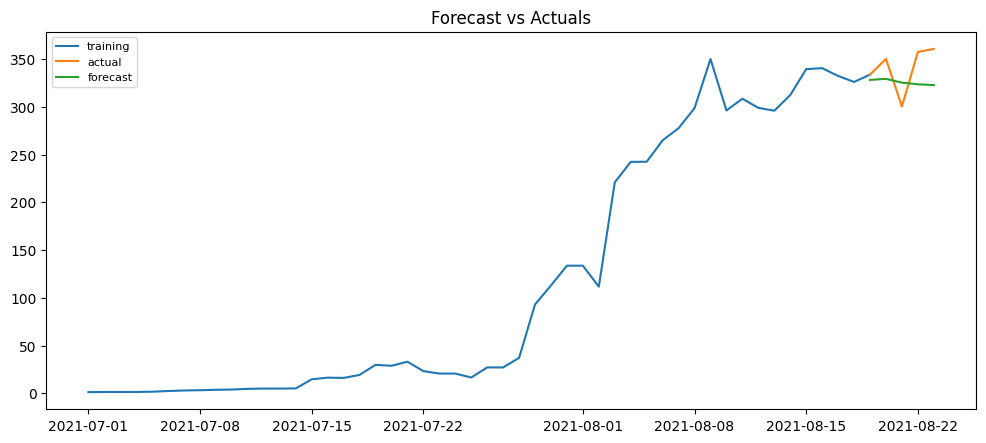

In [8]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(dt[:train_size], train, label='training')
plt.plot(dt[train_size-1:], test, label='actual')
plt.plot(dt[train_size-1:], fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()